In [1]:
import requests
import os
import pandas as pd
from PIL import Image
from io import BytesIO
from bs4 import BeautifulSoup
import tweepy as tp
import json

# Gathering Data

1) Manually downloaded 'twitter_archive_enhanced.csv' from Udacity

2) URL for tweet image predictions: 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

3) Use Tweepy to gether tweet's: Retweet count, favorite count and any other interesting data

## 1) Downloaded Data
Data was directly downloaded from Udacity in a csv file.

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [5]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## 2) Request Data
Data was requested from Udacity's url and read to a txt file. It was then opened in a pandas dataframe. 

In [6]:
url_images = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url_images)

In [7]:
if not os.path.exists('images.txt'):
    with open('images.txt','wb') as file:
        file.write(r.content)
    file.closed
else:
    print("The file exists")

The file exists


In [8]:
images = pd.read_csv('images.txt',sep='\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [10]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## 3) Tweepy Data
Data was gathered using tweet_ids. 

In [11]:
#API_key = 
#API_skey = 
#token = 
#access_token = 
#access_stoken = 

In [12]:
auth = tp.OAuthHandler(API_key, API_skey)
auth.set_access_token(access_token, access_stoken)
api = tp.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [13]:
tweet_list = archive['tweet_id'].tolist()

if not os.path.exists('tweet_json.txt'):
    with open('tweet_json.txt', 'w',encoding='utf-8') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_list:
        
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tp.TweepError as e:
                print("Fail")
                pass

In [14]:
data = []
with open('tweet_json.txt',encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

In [15]:
keys = ['id_str','favorite_count','retweet_count']
tweets=pd.DataFrame()
for i in range(len(data)):
    tweets = tweets.append({keys[0]:data[i][keys[0]],keys[1]:data[i][keys[1]],keys[2]:data[i][keys[2]]},ignore_index=True)

In [16]:
tweets.head()

,favorite_count,id_str,retweet_count
0,34962.0,892420643555336193,7338.0
1,30265.0,892177421306343426,5473.0
2,22779.0,891815181378084864,3621.0
3,38235.0,891689557279858688,7527.0
4,36509.0,891327558926688256,8101.0


In [17]:
tweets.describe()

,favorite_count,retweet_count
count,2331.000000,2331.000000
mean,7299.630631,2583.291720
std,11340.048524,4369.913191
min,0.000000,1.000000
25%,1263.000000,524.000000
50%,3163.000000,1205.000000
75%,8926.000000,2989.000000
max,150258.000000,74148.000000


In [18]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   favorite_count  2331 non-null   float64
 1   id_str          2331 non-null   object 
 2   retweet_count   2331 non-null   float64
dtypes: float64(2), object(1)
memory usage: 54.8+ KB


# Assess Data

8 Quality Issues: Issues with content

    - Archive Data: 
    
        1. timestamp is stored as a more human readable string
        
        2. several columns have NaN values: in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,  
           retweeted_status_user_id, retweeted_status_timestamp
          
        3. name columns do not always have a name
        
        4. doggo,floofer,pupper,puppo columns contain nothing
        
        5. several text columns contain broken hyperlinks (most likely linked to images in the tweets) 
        
    - Image Data:
    
        6. several confidence interval columns have names that are not dogs
        
    - Tweepy Data:
    
        7. favorite_count and retweet_count are floats but these values are integers
        
        8. id is stored as a string (there was a possibility of extracting it as a float but the conversion between and
           float and int was messy)      
          
2 Tidy Issues: Issues with structure

    - Overall:
    
        1. There are three separate dataframes when there can be one
        
        2. the number of tweets varies by each dataframe

# Clean Data

### Addressing the issues:

#### Quality

1) The timestamp will be placed in isoformat for easier machine reading. Pythons datetime library will be used.

2) The several columns in Archive Data will be dropped from the dataframe. 

3) Names for the name columns will be searched for in the "text" columns. And if found placed in the "names" column.

4) Doggo, floofer, pupper, and puppo columns had no data in them and I was unable to find any for them so they will be removed.

5) The broken hyperlinks will be inspected and removed if necessary.

6) The neural network that predicted wrong entity types to the dogs (e.g. fruits, other animals). The first iteration of a dog type will be kept and any predicitons without a dog type will be removed.

7) Favorites and retweets were stored as floats which can cause when applying matematical functions as these values are actually integers.

8) Id was stored as a string, which it is immutable since the number should not change. However, it can be difficult to index by a string, so they were converted to integers. 

#### Tidiness

1) Three separate dataframes were combined along a common axis, which was their tweet id.

2) The number of tweets varied greatly between the three data sets. It was important to ensure that only tweets from the most current WeRateDogs twitter page were kept, so any tweet in the archive that was not also in the tweepy set was removed. Next any tweets that were not ran through the neural network were removed since we could not make any predictions on them. 

### Methodology:

1) Find tweets that are in archive, but not tweepy data. This eventually leads to the conclusion that the archive data contains tweets that no longer exist. Upon further investigation (by manipulating URLs with tweet_ids) it was discovered that pages for these tweets no longer exist. For whatever reason the pages were deleted. To respect WeRateDogs decision to take the posts down any iteration ot these tweet_ids will be removed from the datasets. 

2) The second step I will take is to make the data tidy by the tweepy and archive  data into one dataframe and only keeping selected columns that seem important, setting each column index to the tweets id.

3) Tweet data table will be cleaned. timestamps will be converted to datetime objects and then back to strings so they can be more easily manipulated. The name columns will be filled in.

4) Next non-dog entities will be removed from the data frame and any NaN rows will be removed. 

5) Finally a new column will be created for the dog type based upon what their most likely dog breed is.

### Step 1

In [19]:
#Create copies of all dataframes
df_archive = archive.copy()
df_images = images.copy()
df_tweets = tweets.copy()

In [20]:
#reassigning datatpye for tweet ids in tweepy data
df_tweets['id_str'] = df_tweets['id_str'].astype('int64')
#renaming the columns to be the same as the archive data
df_tweets.rename(columns={'id_str':'tweet_id'},inplace=True)

In [21]:
#this will check if there is anything in df_tweets and not the df_archive
to_add = []
for i in df_tweets['tweet_id'].values:
    if i not in df_archive['tweet_id'].values:
        to_add.append(i)
    else:
        pass
#this will check if there is anything in the df_archive not in df_tweets   
to_add2 = []
for i in df_archive['tweet_id'].values:
    if i not in df_tweets['tweet_id'].values:
        to_add2.append(i)
    else:
        pass   

In [22]:
#to_add2 returns several tweets in the archive that we will need to find from tweepy again
to_add, to_add2

([],
 [888202515573088257,
  873697596434513921,
  872668790621863937,
  872261713294495745,
  869988702071779329,
  866816280283807744,
  861769973181624320,
  856602993587888130,
  851953902622658560,
  845459076796616705,
  844704788403113984,
  842892208864923648,
  837366284874571778,
  837012587749474308,
  829374341691346946,
  827228250799742977,
  812747805718642688,
  802247111496568832,
  779123168116150273,
  775096608509886464,
  771004394259247104,
  770743923962707968,
  759566828574212096,
  754011816964026368,
  680055455951884288])

In [23]:
#running this cell shows that they all failed, they were most likely tweets that also failed before
if not os.path.exists('tweet_json2.txt'):
    with open('tweet_json2.txt', 'w',encoding='utf-8') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in to_add2:
        
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tp.TweepError as e:
                print("Fail")
                pass

In [24]:
#changing the name of the list for clarity
to_remove = to_add2

#generating lists of tweets to remove from each dataframe
image_remove=[]
for i in to_remove:
    if i in df_images['tweet_id'].values:
        image_remove.append(i)
    else:
        pass
archive_remove=[]
for i in to_remove:
    if i in df_archive['tweet_id'].values:
        archive_remove.append(i)
    else:
        pass

#slightly redundant as already checked ids are not in this df, but for sanity and completeness checking again
tweepy_remove=[]
for i in to_remove:
    if i in df_tweets['tweet_id'].values:
        tweepy_remove.append(i)
    else:
        pass

In [25]:
#the lists of tweets to remove
image_remove,archive_remove,tweepy_remove

([888202515573088257,
  873697596434513921,
  872261713294495745,
  861769973181624320,
  851953902622658560,
  844704788403113984,
  842892208864923648,
  837366284874571778,
  837012587749474308,
  829374341691346946,
  802247111496568832,
  779123168116150273,
  771004394259247104,
  759566828574212096,
  754011816964026368,
  680055455951884288],
 [888202515573088257,
  873697596434513921,
  872668790621863937,
  872261713294495745,
  869988702071779329,
  866816280283807744,
  861769973181624320,
  856602993587888130,
  851953902622658560,
  845459076796616705,
  844704788403113984,
  842892208864923648,
  837366284874571778,
  837012587749474308,
  829374341691346946,
  827228250799742977,
  812747805718642688,
  802247111496568832,
  779123168116150273,
  775096608509886464,
  771004394259247104,
  770743923962707968,
  759566828574212096,
  754011816964026368,
  680055455951884288],
 [])

In [26]:
#setting tweet_id to each dfs index
df_images = df_images.set_index('tweet_id')
df_archive = df_archive.set_index('tweet_id')
df_tweets = df_tweets.set_index('tweet_id')

In [27]:
#removing the tweets
for i in image_remove:
    df_images.drop(index=i,inplace=True) 
for i in archive_remove:
    df_archive.drop(index=i,inplace=True) 
for i in tweepy_remove:
    df_tweets.drop(index=i,inplace=True) 

In [28]:
#checking again to ensure tweets are not there
image_remove2=[]
for i in to_remove:
    if i in df_images.index.values:
        image_remove2.append(i)
    else:
        pass
archive_remove2=[]
for i in to_remove:
    if i in df_archive.index.values:
        archive_remove2.append(i)
    else:
        pass

#slightly redundant as already checked ids are not in this df, but for sanity and completeness checking again
tweepy_remove2=[]
for i in to_remove:
    if i in df_tweets.index.values:
        tweepy_remove2.append(i)
    else:
        pass

In [29]:
#Success!
image_remove2,archive_remove2,tweepy_remove2

([], [], [])

### Step 2

In [30]:
df_tweets['favorite_count'] = df_tweets['favorite_count'].astype('int64')
df_tweets['retweet_count'] = df_tweets['retweet_count'].astype('int64')

In [31]:
df_1 = df_archive[['timestamp','text','rating_numerator','rating_denominator','name']]
df_2 = df_tweets[['favorite_count','retweet_count']]

In [32]:
df_data = df_1.join(df_2,how='outer')
df_data = df_data.join(df_images,how='outer')

In [33]:
df_data

,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,
666020888022790149,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,2342,443,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,7,10,a,117,41,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,9,10,a,107,39,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,259,122,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,93,38,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,36509,8101,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,38235,7527,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,22779,3621,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


### Step 3

In [34]:
import datetime
from datetime import date
from datetime import datetime

In [35]:
times = []
for i in df_data.timestamp.values:
    temp = datetime.strptime(i,'%Y-%m-%d %H:%M:%S %z')
    temp = temp.isoformat()
    times.append(temp)
df_data['timestamp'] = times

Now we move on to the names

In [36]:
replace_names=[]
for i in df_data['name']:
    if i=='a' or i=='None':
        replace_names.append(i)
    else:
        pass

In [37]:
#It is possible to use NLP to get the names out of the text
import nltk

In [38]:
test = df_data.text.values[0]
test

'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'

In [39]:
nltk.pos_tag(nltk.tokenize.word_tokenize(test))

[('Here', 'RB'),
 ('we', 'PRP'),
 ('have', 'VBP'),
 ('a', 'DT'),
 ('Japanese', 'JJ'),
 ('Irish', 'JJ'),
 ('Setter', 'NNP'),
 ('.', '.'),
 ('Lost', 'VBN'),
 ('eye', 'NN'),
 ('in', 'IN'),
 ('Vietnam', 'NNP'),
 ('(', '('),
 ('?', '.'),
 (')', ')'),
 ('.', '.'),
 ('Big', 'JJ'),
 ('fan', 'NN'),
 ('of', 'IN'),
 ('relaxing', 'VBG'),
 ('on', 'IN'),
 ('stair', 'NN'),
 ('.', '.'),
 ('8/10', 'CD'),
 ('would', 'MD'),
 ('pet', 'VB'),
 ('https', 'NN'),
 (':', ':'),
 ('//t.co/BLDqew2Ijj', 'NN')]

In [40]:
test2 = df_data.text.values[2230]
test2

'We. Only. Rate. Dogs. Do not send in other things like this fluffy floor shark clearly ready to attack. Get it together guys... 12/10 https://t.co/BZHiKx3FpQ'

In [41]:
nltk.pos_tag(nltk.tokenize.word_tokenize(test2))

[('We', 'PRP'),
 ('.', '.'),
 ('Only', 'RB'),
 ('.', '.'),
 ('Rate', 'NNP'),
 ('.', '.'),
 ('Dogs', 'NNP'),
 ('.', '.'),
 ('Do', 'NNP'),
 ('not', 'RB'),
 ('send', 'VB'),
 ('in', 'IN'),
 ('other', 'JJ'),
 ('things', 'NNS'),
 ('like', 'IN'),
 ('this', 'DT'),
 ('fluffy', 'JJ'),
 ('floor', 'NN'),
 ('shark', 'VBD'),
 ('clearly', 'RB'),
 ('ready', 'JJ'),
 ('to', 'TO'),
 ('attack', 'VB'),
 ('.', '.'),
 ('Get', 'VB'),
 ('it', 'PRP'),
 ('together', 'RB'),
 ('guys', 'VBD'),
 ('...', ':'),
 ('12/10', 'CD'),
 ('https', 'NN'),
 (':', ':'),
 ('//t.co/BZHiKx3FpQ', 'NN')]

In test case 1 it is clear to see the first iteration of the NNP (proper noun) is the dog's name. However, in the second example it is not. Regular expressions were also explored, but again no headway was able to be made. Upon further inspection of the data it appears that not all tweets have the dogs names,so this matter will not be addressed further. 


### Step 4

In [42]:
not_dog=[]
for i in df_data.index:
    if df_data.loc[i]['p1_dog']== False:
        if df_data.loc[i]['p2_dog']== False:
            if df_data.loc[i]['p3_dog']== False:
                not_dog.append(i)
            else:
                pass     
        else: 
            pass   
    else:
        pass

In [43]:
not_dog

[666051853826850816,
 666104133288665088,
 666268910803644416,
 666293911632134144,
 666362758909284353,
 666411507551481857,
 666786068205871104,
 666837028449972224,
 666983947667116034,
 667012601033924608,
 667065535570550784,
 667188689915760640,
 667369227918143488,
 667437278097252352,
 667443425659232256,
 667549055577362432,
 667550882905632768,
 667724302356258817,
 667766675769573376,
 667782464991965184,
 667866724293877760,
 667873844930215936,
 667911425562669056,
 667937095915278337,
 668142349051129856,
 668154635664932864,
 668226093875376128,
 668291999406125056,
 668466899341221888,
 668544745690562560,
 668614819948453888,
 668620235289837568,
 668643542311546881,
 668645506898350081,
 668981893510119424,
 668988183816871936,
 668992363537309700,
 669015743032369152,
 669214165781868544,
 669351434509529089,
 669571471778410496,
 669583744538451968,
 669661792646373376,
 669682095984410625,
 669749430875258880,
 669923323644657664,
 669972011175813120,
 670037189829

In [44]:
#This is not entirely accurate as some images do contain dogs in them, however, we want to use that the neural network 
#assigned the correct dog to an image
for i in not_dog:
    df_data.drop(index=i,inplace=True) 

In [45]:
#drop any rows that were not ran in the neural network
df_data.dropna(axis=0, how='any',inplace=True)
df_data

,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,
666020888022790149,2015-11-15T22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,2342,443,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,2015-11-15T23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,7,10,a,117,41,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,2015-11-15T23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,9,10,a,107,39,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,2015-11-16T00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,259,122,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,2015-11-16T00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,93,38,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891087950875897856,2017-07-29T00:08:17+00:00,Here we have a majestic great white breaching ...,13,10,None,18417,2715,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
891327558926688256,2017-07-29T16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,36509,8101,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
891689557279858688,2017-07-30T15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,38235,7527,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [46]:
breed = []
miss = []
for i in df_data.index:
    if df_data.loc[i]['p1_dog'] == True:
        breed.append(df_data.loc[i]['p1'])
    elif df_data.loc[i]['p1_dog'] == False and df_data.loc[i]['p2_dog'] == True:
        breed.append(df_data.loc[i]['p2'])
    elif df_data.loc[i]['p1_dog'] == False and df_data.loc[i]['p2_dog'] == False and df_data.loc[i]['p3_dog']==True:
         breed.append(df_data.loc[i]['p3'])
    else:
        miss.append(df_data.loc[i])

In [47]:
#this is good!
miss

[]

In [48]:
#lowercase all entries
for i,dog in enumerate(breed):
    breed[i] = dog.lower()

In [49]:
#there appears to be some iterations of dogs like terriers with different adjectives but they seem to be different breeds. 
#so we will not combine them
pd.Series(breed).unique()

array(['welsh_springer_spaniel', 'redbone', 'german_shepherd',
       'rhodesian_ridgeback', 'miniature_pinscher',
       'bernese_mountain_dog', 'chow', 'golden_retriever',
       'miniature_poodle', 'gordon_setter', 'walker_hound', 'pug',
       'bloodhound', 'lhasa', 'english_setter', 'italian_greyhound',
       'maltese_dog', 'newfoundland', 'malamute',
       'soft-coated_wheaten_terrier', 'chihuahua',
       'black-and-tan_coonhound', 'toy_terrier', 'blenheim_spaniel',
       'pembroke', 'irish_terrier', 'chesapeake_bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'ibizan_hound',
       'border_collie', 'labrador_retriever', 'miniature_schnauzer',
       'airedale', 'rottweiler', 'west_highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'siberian_husky',
       'papillon', 'saint_bernard', 'tibetan_terrier', 'borzoi', 'beagle',
       'yorkshire_terrier', 'pomeranian', 'kuvasz',
       'flat-coated_retriever', 'norwegian_elkhound', 'boxer',
   

In [50]:
df_data['breed']=breed

In [51]:
#create final combined table with only necessary columns
df_final=df_data[['timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'favorite_count', 'retweet_count', 'jpg_url', 'breed']]

In [52]:
df_final.to_csv('twitter_archive_master.csv')

# Analysis

In [53]:
import matplotlib.pyplot as plt
import numpy as np

In [54]:
#observing a handful of dog breeds to determine if we should use medain or mean
ch = np.array(df_final[df_final['breed']=='chihuahua']['favorite_count'])
ch_t = df_final[df_final['breed']=='chihuahua']['timestamp'].values
#the large outlier
df_final[(df_final['breed']=='chihuahua') &(df_final['favorite_count']>100000)].index.values

array([807106840509214720], dtype=int64)

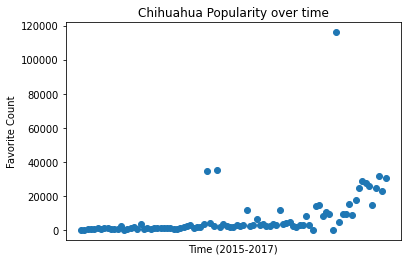

In [55]:
#data appears to be left skewed with one very large outlier. Use median
plt.scatter(ch_t,ch)
plt.xticks([]);
plt.ylabel('Favorite Count')
plt.xlabel('Time (2015-2017)')
plt.title('Chihuahua Popularity over time');

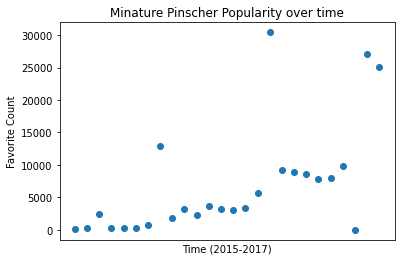

In [56]:
#less data, but again left skewed. use median
mp = np.array(df_final[df_final['breed']=='miniature_pinscher']['favorite_count'])
mp_t = df_final[df_final['breed']=='miniature_pinscher']['timestamp'].values
plt.scatter(mp_t,mp)
plt.xticks([]);
plt.ylabel('Favorite Count')
plt.xlabel('Time (2015-2017)')
plt.title('Minature Pinscher Popularity over time');
plt.savefig('popvtime.png')

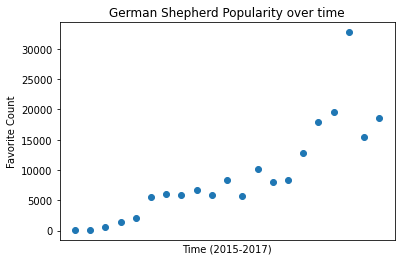

In [57]:
#left skewed again. Use median
gs = np.array(df_final[df_final['breed']=='german_shepherd']['favorite_count'])
gs_t = df_final[df_final['breed']=='german_shepherd']['timestamp'].values
plt.scatter(gs_t,gs)
plt.xticks([]);
plt.ylabel('Favorite Count')
plt.xlabel('Time (2015-2017)')
plt.title('German Shepherd Popularity over time');

It appears the trend here is that data is leftwards trending. This is most likely due to an increase of popularity in the account rather than in the dogs. The median value will be used to compare dog breeds.

In [58]:
breeds = df_final['breed'].unique()
fav_breed=[]
for i in breeds:
    fav_breed.append(np.median(df_final[df_final['breed']==i]['favorite_count'].values))
comb_breed = list(zip(breeds,fav_breed))

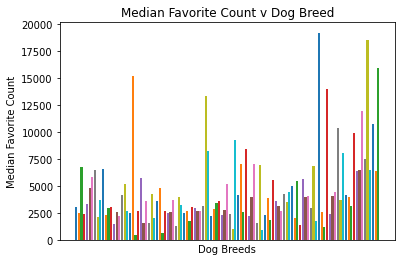

In [59]:
for (x,y) in comb_breed:
    plt.bar(x,y)
plt.xticks([])
plt.ylabel('Median Favorite Count')
plt.title('Median Favorite Count v Dog Breed')
plt.xlabel('Dog Breeds')
plt.savefig('meddog.png')

Unfortunately with the large amount of dogs it is difficult to see what dogs really are the most favorited. Therefore, we will only look at those with median favorites higher than 7500.

In [60]:
high_breed=[]
for i,item in enumerate(comb_breed):
    if comb_breed[i][1]>7500:
        high_breed.append(item)
    else:
        pass


# Visualization

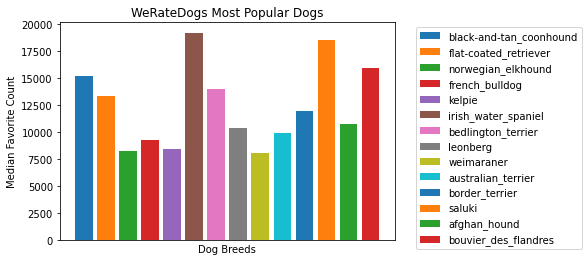

In [61]:
%matplotlib inline
for (x,y) in high_breed:
    plt.bar(x,y,label=x)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.xticks([]);
plt.xlabel('Dog Breeds');
plt.ylabel('Median Favorite Count');
plt.title('WeRateDogs Most Popular Dogs');
plt.savefig('BarChart.png',bbox_inches='tight')

In [62]:
#check the top candidates to see how large there datasets are
top_cands = []
for i,item in enumerate(high_breed):
    top_cands.append((item,df_final[df_final['breed']==item[0]].shape[0]))
    

In [63]:
top_cands

[(('black-and-tan_coonhound', 15154.5), 2),
 (('flat-coated_retriever', 13297.0), 8),
 (('norwegian_elkhound', 8255.5), 12),
 (('french_bulldog', 9277.0), 30),
 (('kelpie', 8423.0), 13),
 (('irish_water_spaniel', 19179.0), 3),
 (('bedlington_terrier', 13942.0), 6),
 (('leonberg', 10395.0), 3),
 (('weimaraner', 8015.5), 4),
 (('australian_terrier', 9866.0), 2),
 (('border_terrier', 11936.0), 7),
 (('saluki', 18475.5), 4),
 (('afghan_hound', 10746.5), 4),
 (('bouvier_des_flandres', 15917.0), 1)]

Some of the top candidates have very small datasets (bouvier_des_flandres only has 1!). This could be misrepresenting our data as we are not using enough data to base a decision off of and are ignoring other potential dog breeds. I will keep this for now, but it would be something look for in the future. 

# Insights

1) We can see that of the breeds bouvier_des_flandres has the highest median according to our results. However, this should be further explored as there is only one tweet containing a dog of that breed

2) Most dog breeds had a median favorite retweet of less than 7500 votes. This could be indicative that most dogs are equal in favoritability and only those that really stand out get more votes. 

3) WeRateDogs twitter page grew drastically from 2015-2017. Most data appears left-skewed indicating that dogs were less popular in 2015 than 2017. However, the real reason the data is most likely skewed is that the WeRateDogs twitter account grew in popularity and thus favorites. 